In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Bigger font
sns.set(font_scale=1.3)
plt.style.use('fivethirtyeight')
# Figure size®
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 2.5
rcParams['lines.marker'] = '.'
rcParams['lines.linewidth'] = 1
rcParams['lines.markersize'] = 5
rcParams['legend.fontsize'] = 10
rcParams['axes.titlesize'] = 16
# plt.rc('figure.subplot', wspace=.33)
# Slides
from notebook.services.config import ConfigManager
cm = ConfigManager()
# cm.update('livereveal', {'width': 1024, 'height': 768, 'scroll': True, 'theme': 'simple', 'transition': 'linear'});
# np.random.seed(123)

from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"  # print not only the last variable
%config InlineBackend.figure_format ='retina'  # retine quality plots

## Energy Data

### Numerical Features

In [2]:
data_energy = pd.read_csv("data/energy.csv")
print(data_energy.shape)
print(data_energy.dtypes)
data_energy.head(100)

(1292, 40)
country                                     object
iso_code                                    object
year                                         int64
gdp                                          int64
population                                   int64
electricity_generation                     float64
per_capita_electricity                     float64
biofuel_electricity                        float64
coal_electricity                           float64
gas_electricity                            float64
oil_electricity                            float64
hydro_electricity                          float64
nuclear_electricity                        float64
solar_electricity                          float64
wind_electricity                           float64
other_renewable_exc_biofuel_electricity    float64
coal_production                            float64
gas_production                             float64
oil_production                             float64
biofuel_consumption 

,country,iso_code,year,gdp,population,electricity_generation,per_capita_electricity,biofuel_electricity,coal_electricity,gas_electricity,...,gas_share_elec,oil_share_elec,hydro_share_elec,nuclear_share_elec,solar_share_elec,wind_share_elec,energy_cons_change_pct,energy_cons_change_twh,energy_per_gdp,energy_per_capita
0,Algeria,DZA,2000,252000000000,31042000,23.890,769.587,0.000,0.000,23.837,...,99.778,0.000,0.222,0.0,0.000,0.000,-3.681,-11.462,1.190,9662.271
1,Algeria,DZA,2001,252000000000,31452000,25.031,795.836,0.000,0.000,24.963,...,99.728,0.000,0.272,0.0,0.000,0.000,3.622,10.865,1.233,9881.754
2,Algeria,DZA,2002,266000000000,31855000,25.992,815.933,0.000,0.000,25.936,...,99.785,0.000,0.215,0.0,0.000,0.000,3.584,11.140,1.210,10106.442
3,Algeria,DZA,2003,289000000000,32264000,27.810,861.940,0.000,0.000,27.548,...,99.058,0.000,0.942,0.0,0.000,0.000,4.639,14.935,1.166,10441.229
4,Algeria,DZA,2004,308000000000,32692000,29.387,898.907,0.000,0.000,29.139,...,99.156,0.000,0.844,0.0,0.000,0.000,3.817,12.858,1.136,10697.854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Bangladesh,BGD,2010,373000000000,147575008,38.494,260.843,0.001,0.865,29.601,...,76.897,18.683,1.985,0.0,0.182,0.005,2.379,5.819,0.671,1696.825
96,Bangladesh,BGD,2011,432000000000,149272992,41.664,279.112,0.001,0.934,31.980,...,76.757,18.649,2.196,0.0,0.148,0.005,8.667,21.703,0.630,1822.913
97,Bangladesh,BGD,2012,425000000000,151006000,45.735,302.869,0.001,1.017,34.793,...,76.076,19.915,1.784,0.0,0.000,0.000,7.058,19.206,0.685,1929.179
98,Bangladesh,BGD,2013,446000000000,152760992,50.041,327.579,0.001,1.059,37.148,...,74.234,21.490,1.876,0.0,0.272,0.008,3.041,8.860,0.673,1965.017


In [3]:
data_energy.describe()

,year,gdp,population,electricity_generation,per_capita_electricity,biofuel_electricity,coal_electricity,gas_electricity,oil_electricity,hydro_electricity,...,gas_share_elec,oil_share_elec,hydro_share_elec,nuclear_share_elec,solar_share_elec,wind_share_elec,energy_cons_change_pct,energy_cons_change_twh,energy_per_gdp,energy_per_capita
count,1292.000000,1.292000e+03,1.292000e+03,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,...,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000,1292.000000
mean,2008.000000,1.005959e+12,7.339487e+07,242.352544,6146.776344,3.598087,97.165509,51.141943,13.303246,37.529803,...,32.325443,13.734461,18.834847,9.847744,0.314008,1.748916,2.174558,34.093770,1.787893,44829.587071
std,4.900876,2.256734e+12,2.061520e+08,647.537855,6551.959512,9.253748,388.023718,125.816005,26.236593,100.445540,...,30.096254,22.808802,23.843796,17.916070,1.033216,4.371174,5.943959,201.120471,1.117826,41175.927174
min,2000.000000,1.001203e+10,2.800000e+05,0.419000,116.507000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-25.941000,-1299.083000,0.275000,1065.242000
25%,2004.000000,1.507500e+11,5.434250e+06,29.345750,2196.314000,0.002000,0.000000,3.241500,0.786000,0.398500,...,7.869500,1.138750,0.856750,0.000000,0.000000,0.000000,-0.972250,-3.124000,1.126000,18131.588750
50%,2008.000000,3.280000e+11,1.849350e+07,62.737000,4757.696000,0.334500,7.074000,14.149000,3.779000,6.374500,...,21.714000,3.770000,8.741500,0.000000,0.003000,0.075500,1.703500,6.817500,1.498500,34046.914500
75%,2012.000000,8.380000e+11,5.956800e+07,168.668500,7737.402500,2.544250,35.666000,50.811250,12.177000,25.678750,...,50.845500,14.987250,26.631750,14.495250,0.056250,1.420250,5.181250,31.480000,2.045000,53935.225500
max,2016.000000,1.720000e+13,1.414049e+09,6022.800000,56235.636000,65.400000,3980.500000,1391.114000,193.983000,1174.800000,...,100.000000,100.000000,99.573000,82.976000,12.778000,48.835000,63.036000,2686.251000,8.997000,259410.061000


### Categorical Features

In [4]:
def get_numcat_cols(df):
    numerical = df._get_numeric_data().columns
    categorical = df.columns.difference(numerical)
    return (numerical, categorical)

In [5]:
numerical, categorical = get_numcat_cols(data_energy)

print(numerical)
print(categorical)

data_energy[categorical].describe()

Index(['year', 'gdp', 'population', 'electricity_generation',
       'per_capita_electricity', 'biofuel_electricity', 'coal_electricity',
       'gas_electricity', 'oil_electricity', 'hydro_electricity',
       'nuclear_electricity', 'solar_electricity', 'wind_electricity',
       'other_renewable_exc_biofuel_electricity', 'coal_production',
       'gas_production', 'oil_production', 'biofuel_consumption',
       'coal_consumption', 'gas_consumption', 'oil_consumption',
       'hydro_consumption', 'nuclear_consumption',
       'primary_energy_consumption', 'solar_consumption', 'wind_consumption',
       'biofuel_share_elec', 'coal_share_elec', 'gas_share_elec',
       'oil_share_elec', 'hydro_share_elec', 'nuclear_share_elec',
       'solar_share_elec', 'wind_share_elec', 'energy_cons_change_pct',
       'energy_cons_change_twh', 'energy_per_gdp', 'energy_per_capita'],
      dtype='object')
Index(['country', 'iso_code'], dtype='object')


,country,iso_code
count,1292,1292
unique,76,76
top,Colombia,UZB
freq,17,17


### Resources

['biofuel', 'coal', 'gas', 'oil', 'hydro', 'nuclear', 'solar', 'wind']

In [6]:
resources = [s.replace('_consumption','') for s in data_energy.columns[data_energy.columns.str.contains('consumption')].to_list()] 

In [7]:
resources.remove('primary_energy')
resources

['biofuel', 'coal', 'gas', 'oil', 'hydro', 'nuclear', 'solar', 'wind']

fossil fuels = coal + oil + gas 

renewables = solar + wind + hydro + biofuel + other_renewables 

low_carbon = renewables + nuclear

In [8]:
resources_columns = [i + '_consumption' for i in resources]

resources_columns = ['coal_consumption',
                     'oil_consumption',
                     'gas_consumption',
                     'nuclear_consumption',
 'solar_consumption',
 'wind_consumption',
 'hydro_consumption',
 'biofuel_consumption',
]

## Worldwide Governance Indicators

### Numerical Features

In [9]:
data_gov = pd.read_csv("data/WGI.csv")
print(data_gov.shape)
print(data_gov.dtypes)
data_gov.head(5)

(1292, 9)
country                           object
iso_code                          object
year                               int64
VoiceandAccountability           float64
Political StabilityNoViolence    float64
GovernmentEffectiveness          float64
RegulatoryQuality                float64
RuleofLaw                        float64
ControlofCorruption              float64
dtype: object


,country,iso_code,year,VoiceandAccountability,Political StabilityNoViolence,GovernmentEffectiveness,RegulatoryQuality,RuleofLaw,ControlofCorruption
0,Algeria,DZA,2000,-1.110052,-1.432010,-0.963841,-0.705386,-1.211336,-0.937911
1,Algeria,DZA,2001,-1.077356,-1.532622,-0.780680,-0.644429,-0.920747,-0.906796
2,Algeria,DZA,2002,-1.044660,-1.633234,-0.597520,-0.583472,-0.630159,-0.875681
3,Algeria,DZA,2003,-1.076718,-1.753627,-0.612373,-0.517234,-0.587644,-0.692261
4,Algeria,DZA,2004,-0.802059,-1.359521,-0.572631,-0.544127,-0.620909,-0.679478


### Categorical Features

In [10]:
def get_numcat_cols(df):
    numerical = df._get_numeric_data().columns
    categorical = df.columns.difference(numerical)
    return (numerical, categorical)

In [11]:
numerical, categorical = get_numcat_cols(data_gov)

print(numerical)
print(categorical)

data_gov[categorical].describe()

Index(['year', 'VoiceandAccountability', 'Political StabilityNoViolence',
       'GovernmentEffectiveness', 'RegulatoryQuality', 'RuleofLaw',
       'ControlofCorruption'],
      dtype='object')
Index(['country', 'iso_code'], dtype='object')


,country,iso_code
count,1292,1292
unique,76,76
top,Colombia,UZB
freq,17,17


### Countries

In [12]:
country_columns = data_gov['country'].unique()
print(len(country_columns))
country_columns

76


array(['Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Ecuador', 'Egypt', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malaysia', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand',
       'Norway', 'Oman', 'Pakistan', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia',
       'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea',
       'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Thailand',
       'Trinidad and Tobago', 'Turkey', 'Turkmenistan', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uzbekistan', 'V

### No missing variables

In [13]:
#data_gov.isnull().sum()

## Time series insight

In [14]:
data_gov_country = data_gov[data_gov['country'] == 'Mexico']

In [15]:
data_gov_country['year'].tolist()

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

In [16]:
data_gov_country.head()

,country,iso_code,year,VoiceandAccountability,Political StabilityNoViolence,GovernmentEffectiveness,RegulatoryQuality,RuleofLaw,ControlofCorruption
714,Mexico,MEX,2000,0.258450,-0.198165,0.242370,0.253666,-0.382611,-0.245629
715,Mexico,MEX,2001,0.302247,-0.127090,0.256440,0.353473,-0.346190,-0.213245
716,Mexico,MEX,2002,0.346043,-0.056015,0.270510,0.453281,-0.309769,-0.180860
717,Mexico,MEX,2003,0.346937,-0.116509,0.206554,0.363714,-0.332210,-0.167082
718,Mexico,MEX,2004,0.319828,-0.213861,0.122851,0.426816,-0.374086,-0.303954


In [17]:
data_gov = pd.read_csv("data/WGI.csv")
# d = pd.to_datetime(data_gov['year']).dt.to_period('Y')
data_gov = data_gov.set_index('year')

In [18]:
data_gov.head(2)

,country,iso_code,VoiceandAccountability,Political StabilityNoViolence,GovernmentEffectiveness,RegulatoryQuality,RuleofLaw,ControlofCorruption
year,,,,,,,,
2000,Algeria,DZA,-1.110052,-1.432010,-0.963841,-0.705386,-1.211336,-0.937911
2001,Algeria,DZA,-1.077356,-1.532622,-0.780680,-0.644429,-0.920747,-0.906796


## A single country

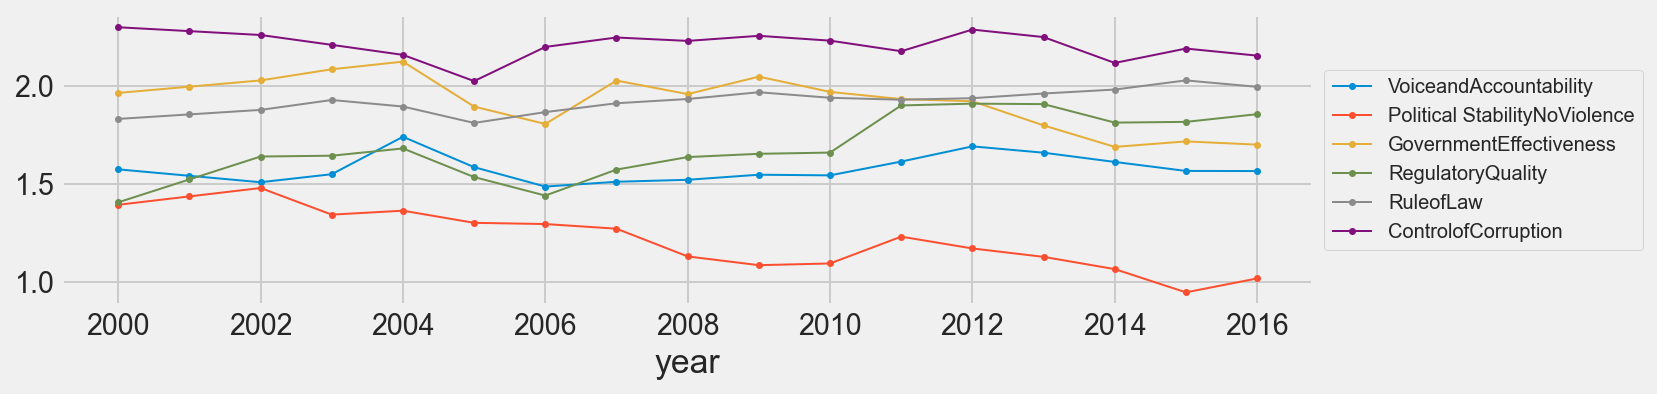

In [19]:
country = 'Sweden'
gov_country = data_gov[data_gov['country'] == country]
gov_country.plot()
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

fossil fuels = coal + oil + gas 

renewables = solar + wind + hydro + biofuel + other_renewables 

low_carbon = renewables + nuclear

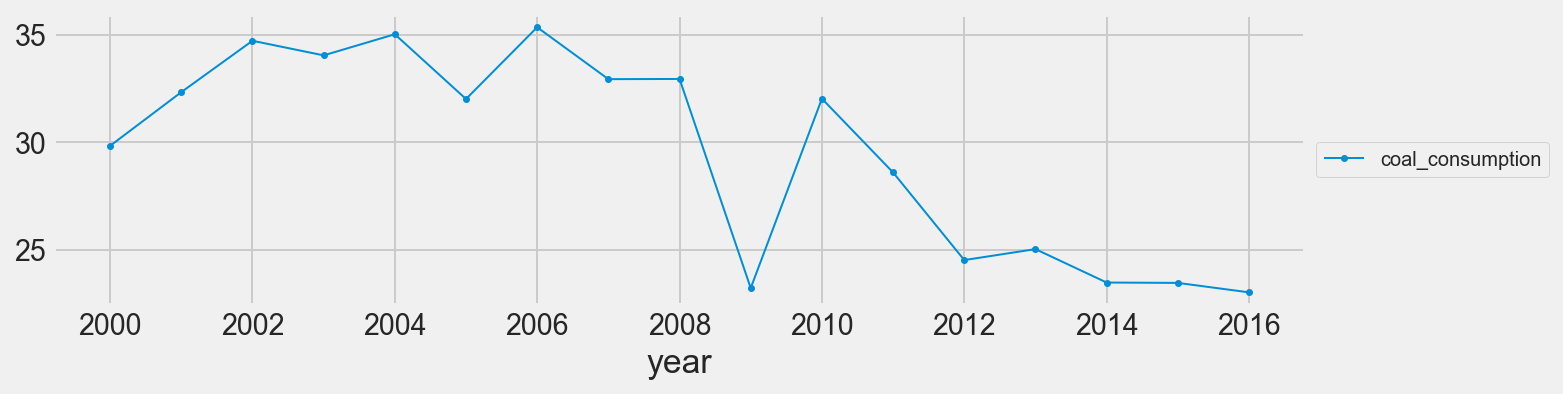

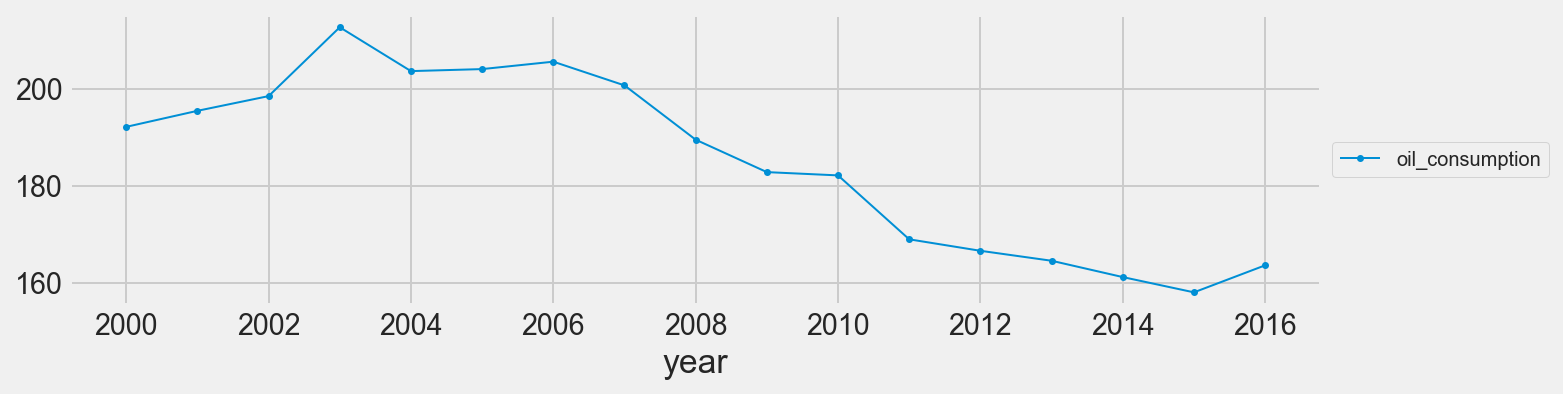

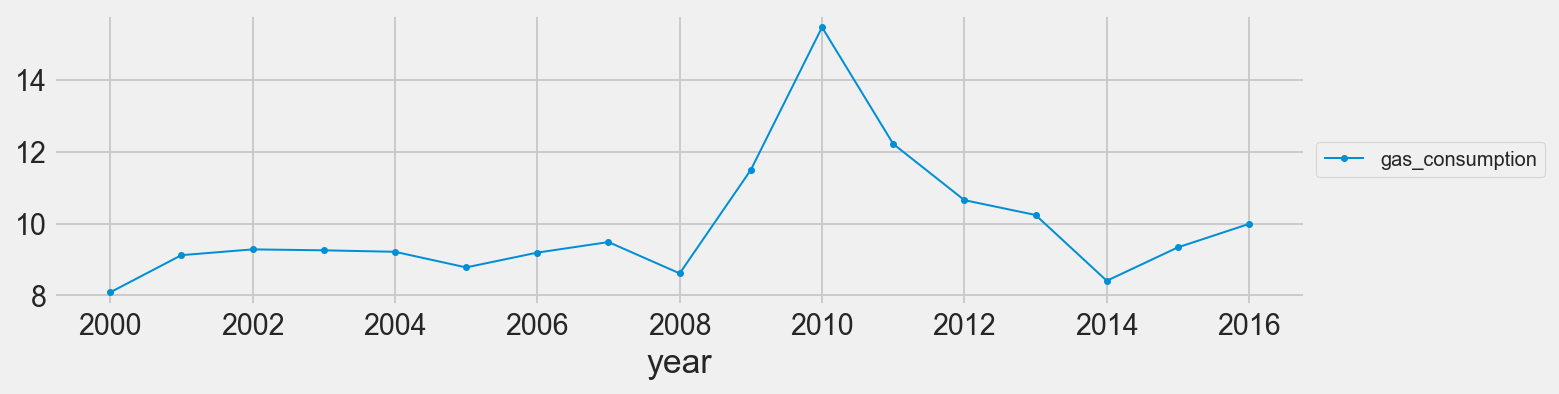

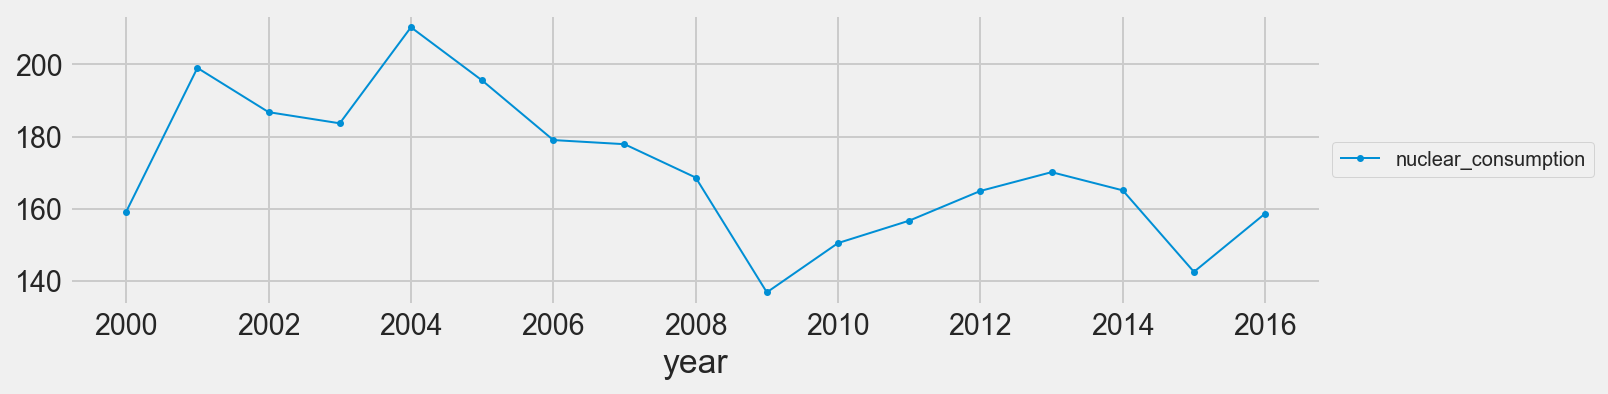

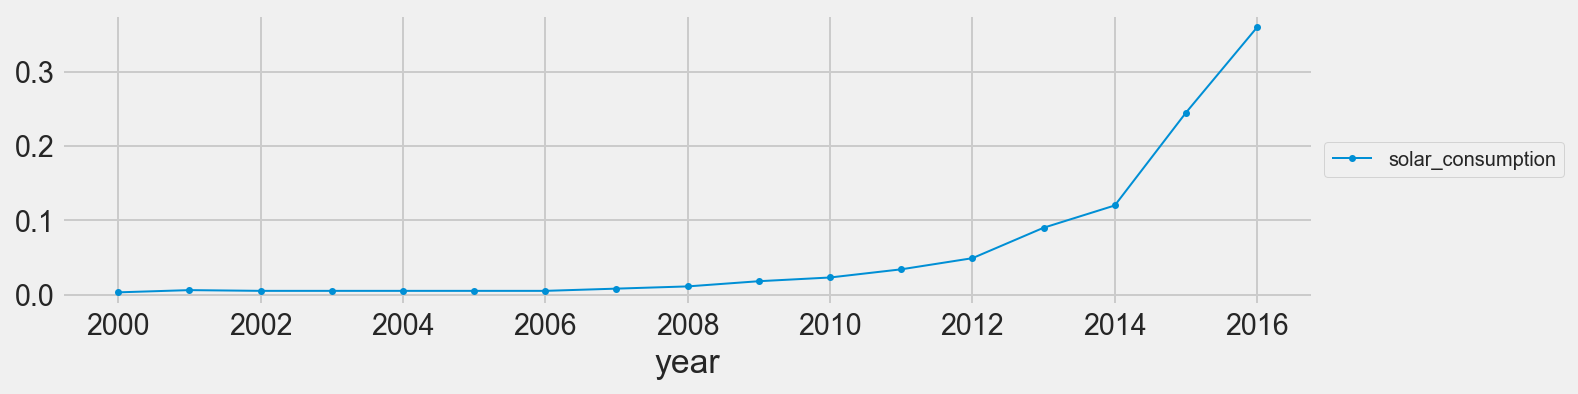

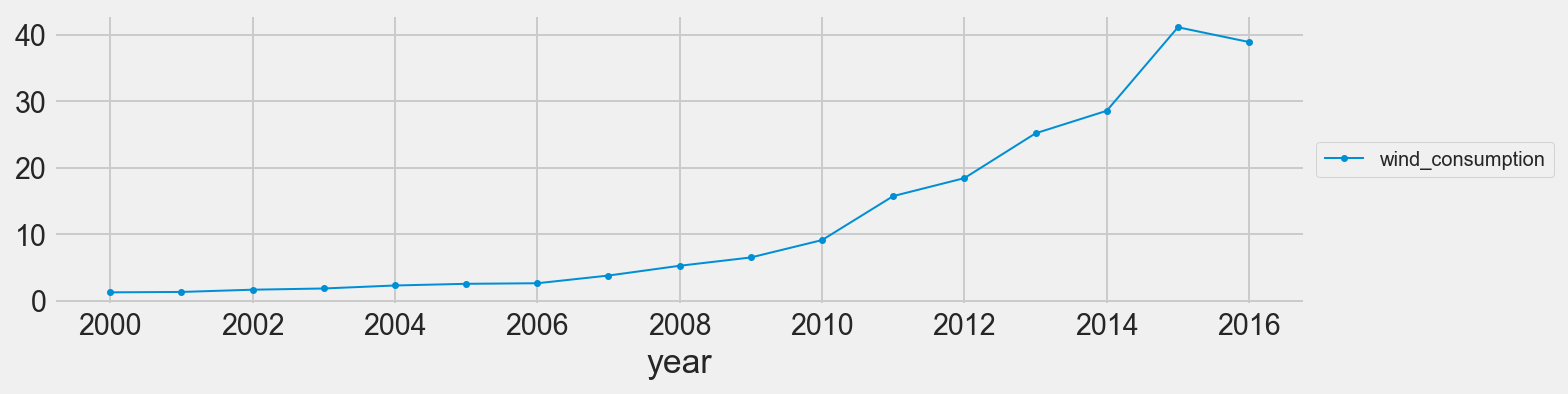

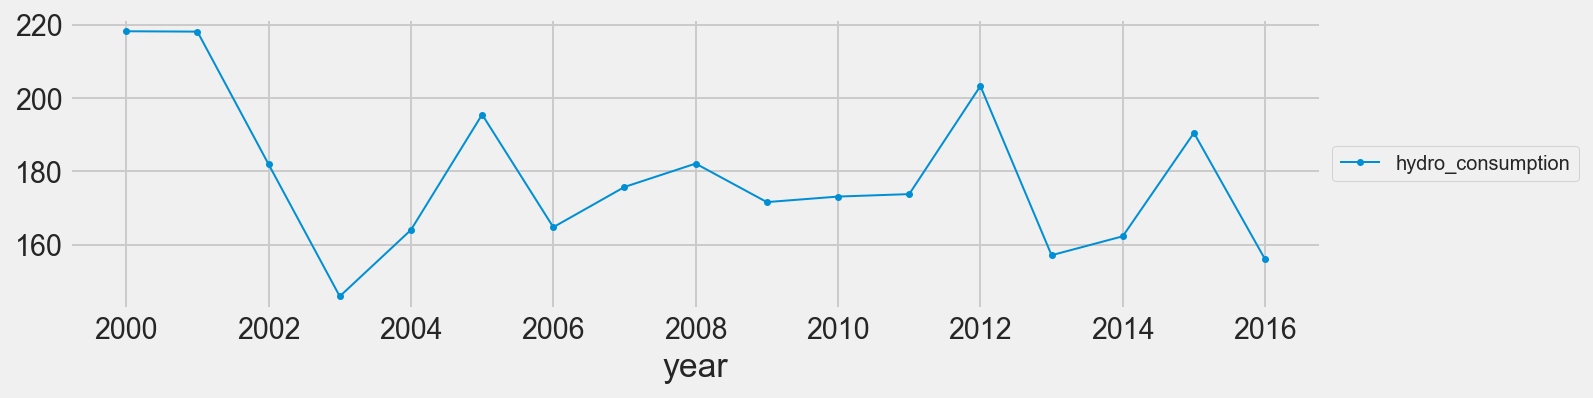

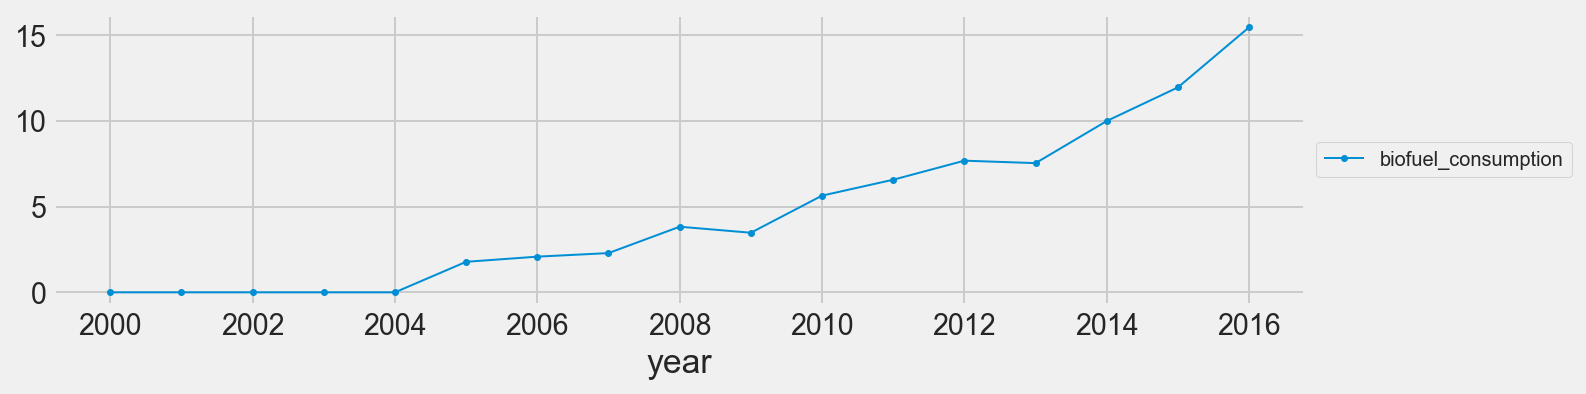

In [20]:
for resource in resources_columns:
    plt.figure()
    energy_country = data_energy[data_energy['country'] == country].set_index('year')[resource]
    energy_country.plot()
    plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Using gov data

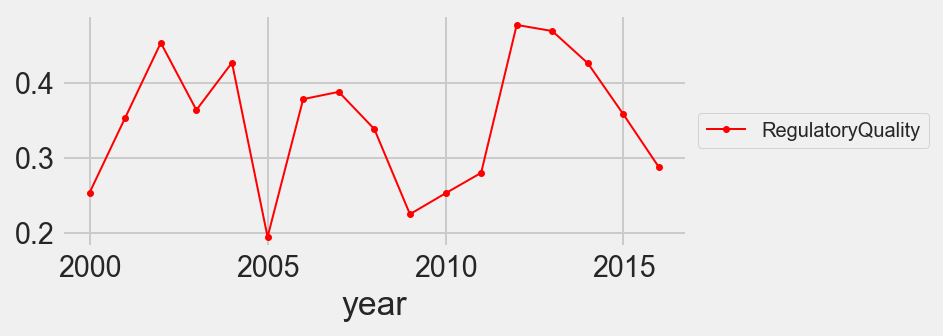

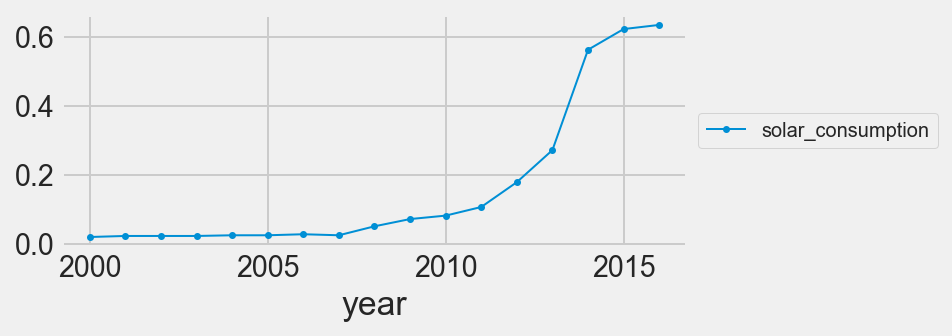

In [21]:
country = 'Mexico'

plt.figure(figsize=(5, 2))
gov_country = data_gov[data_gov['country'] == country]
gov_country['RegulatoryQuality'].plot(c='red')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.figure(figsize=(5, 2))
energy_country = data_energy[data_energy['country'] == country].set_index('year')['solar_consumption']
energy_country.plot()

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

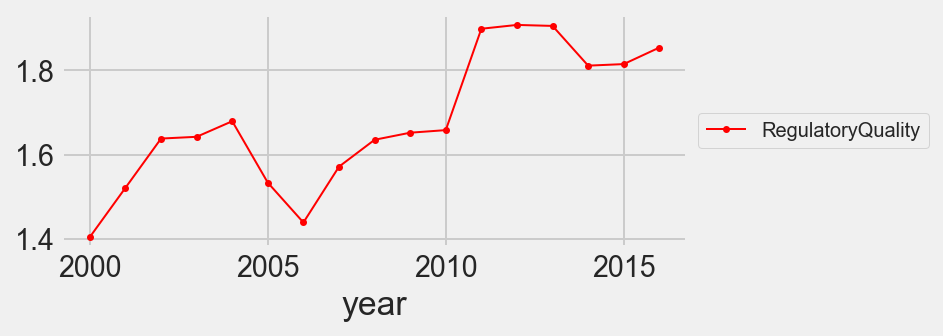

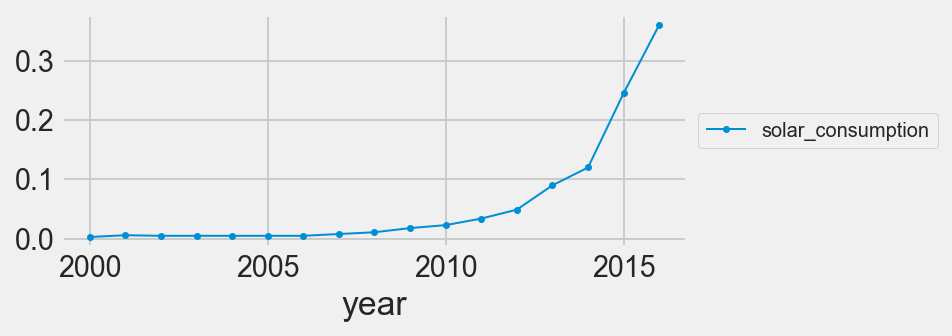

In [22]:
country = 'Sweden'

plt.figure(figsize=(5, 2))
gov_country = data_gov[data_gov['country'] == country]
gov_country['RegulatoryQuality'].plot(c='red')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.figure(figsize=(5, 2))
energy_country = data_energy[data_energy['country'] == country].set_index('year')['solar_consumption']
energy_country.plot()

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

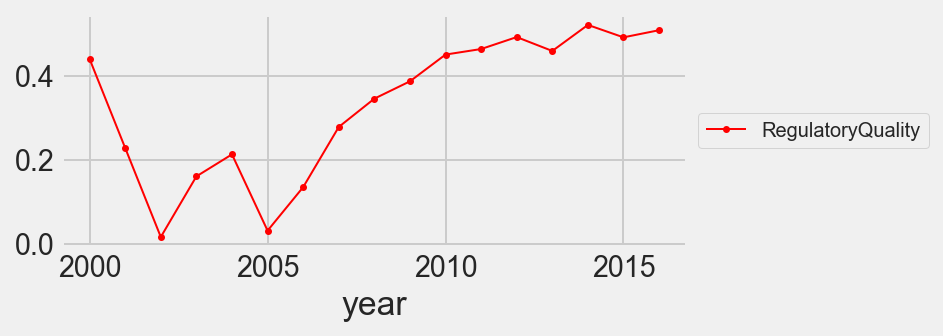

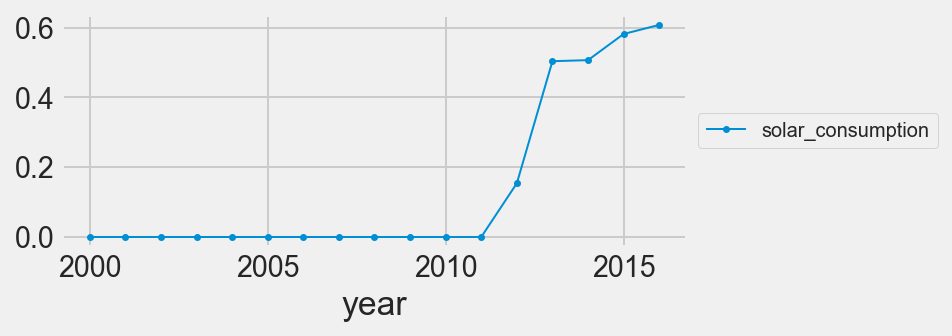

In [23]:
country = 'Peru'

plt.figure(figsize=(5, 2))
gov_country = data_gov[data_gov['country'] == country]
gov_country['RegulatoryQuality'].plot(c='red')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.figure(figsize=(5, 2))
energy_country = data_energy[data_energy['country'] == country].set_index('year')['solar_consumption']
energy_country.plot()

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

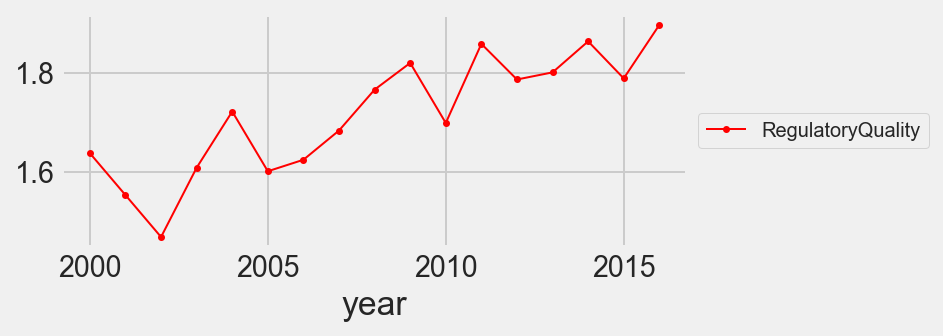

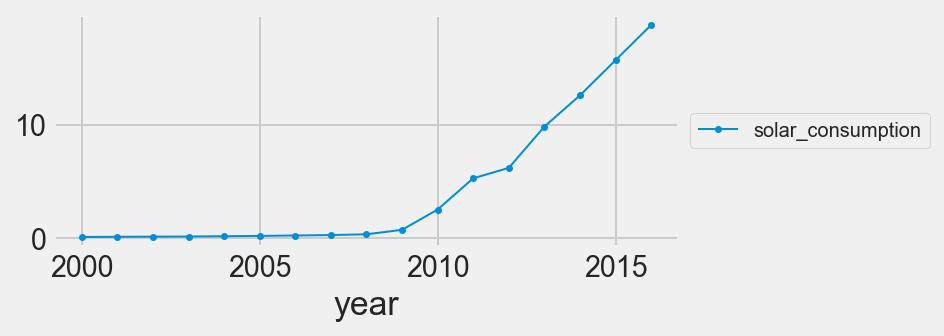

In [24]:
country = 'Australia'
plt.figure(figsize=(5, 2))
gov_country = data_gov[data_gov['country'] == country]
gov_country['RegulatoryQuality'].plot(c='red')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.figure(figsize=(5, 2))
energy_country = data_energy[data_energy['country'] == country].set_index('year')['solar_consumption']
energy_country.plot()

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

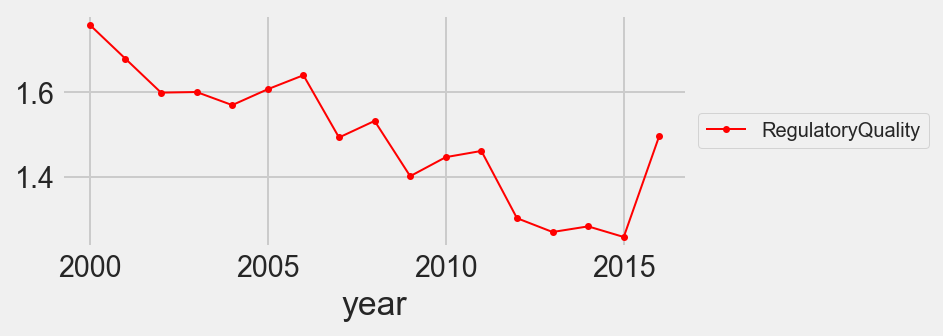

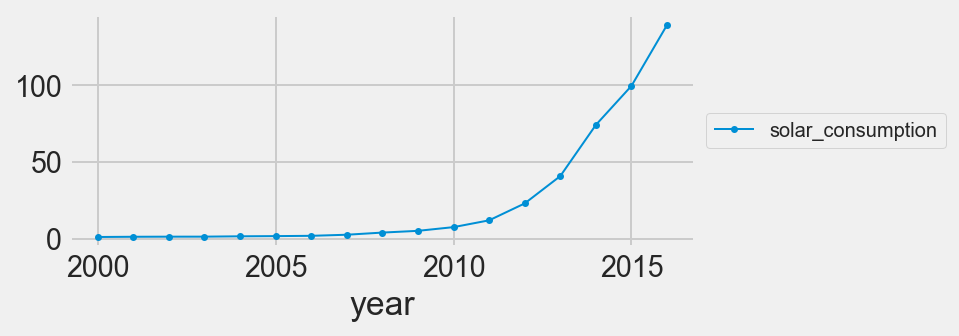

In [25]:
country = 'United States'
plt.figure(figsize=(5, 2))
gov_country = data_gov[data_gov['country'] == country]
gov_country['RegulatoryQuality'].plot(c='red')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.figure(figsize=(5, 2))
energy_country = data_energy[data_energy['country'] == country].set_index('year')['solar_consumption']
energy_country.plot()

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

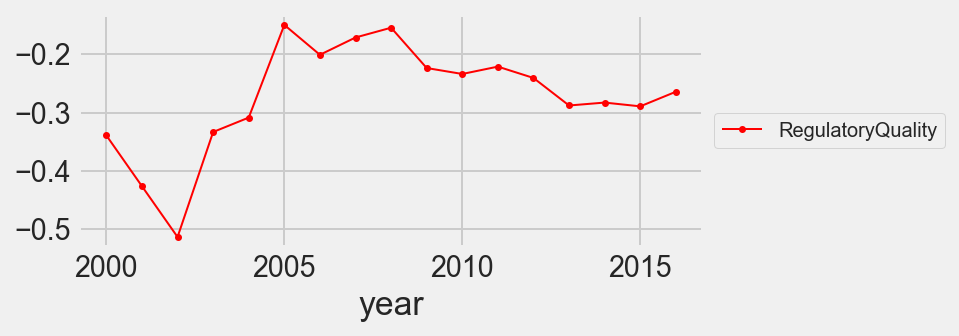

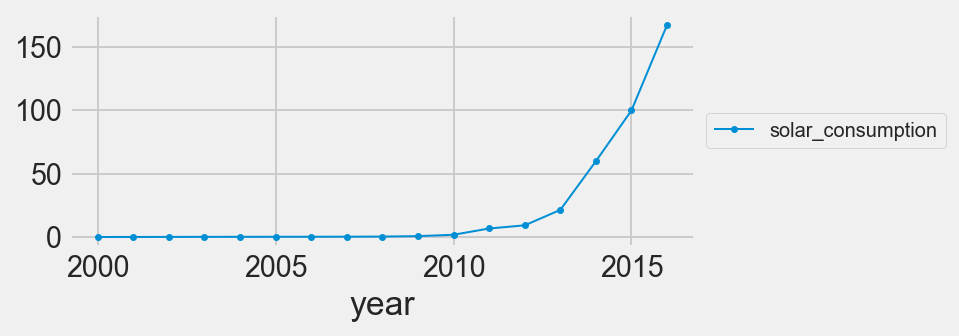

In [38]:
country = 'China'
plt.figure(figsize=(5, 2))
gov_country = data_gov[data_gov['country'] == country]
gov_country['RegulatoryQuality'].plot(c='red')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.figure(figsize=(5, 2))
energy_country = data_energy[data_energy['country'] == country].set_index('year')['solar_consumption']
energy_country.plot()

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

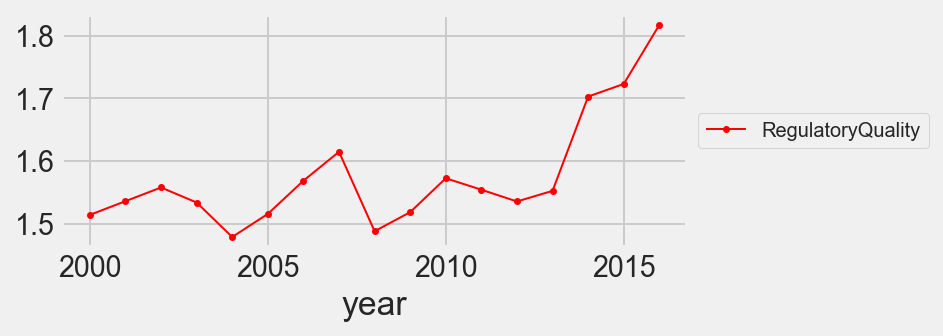

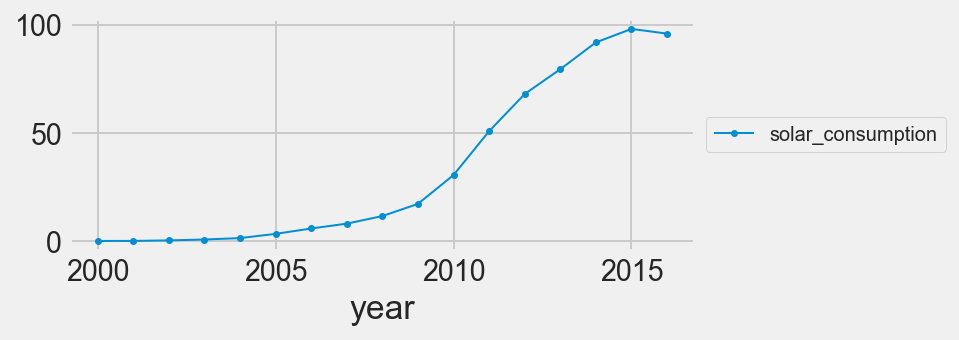

In [39]:
country = 'Germany'
plt.figure(figsize=(5, 2))
gov_country = data_gov[data_gov['country'] == country]
gov_country['RegulatoryQuality'].plot(c='red')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.figure(figsize=(5, 2))
energy_country = data_energy[data_energy['country'] == country].set_index('year')['solar_consumption']
energy_country.plot()

plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Exploring a single year

In [26]:
gov_country[gov_country.index == 2016]

,country,iso_code,VoiceandAccountability,Political StabilityNoViolence,GovernmentEffectiveness,RegulatoryQuality,RuleofLaw,ControlofCorruption
year,,,,,,,,
2016,United States,USA,1.110259,0.402303,1.47634,1.497076,1.618124,1.373549


In [27]:
data_energy_year = data_energy[data_energy['year'] == 2016]
data_energy_year.head(2)

,country,iso_code,year,gdp,population,electricity_generation,per_capita_electricity,biofuel_electricity,coal_electricity,gas_electricity,...,gas_share_elec,oil_share_elec,hydro_share_elec,nuclear_share_elec,solar_share_elec,wind_share_elec,energy_cons_change_pct,energy_cons_change_twh,energy_per_gdp,energy_per_capita
16,Algeria,DZA,2016,534000000000,40551000,66.755,1646.200,0.000,0.000,66.423,...,99.503,0.000,0.323,0.000,0.13,0.043,-0.107,-0.663,1.155,15210.944
33,Argentina,ARG,2016,820000000000,43508000,139.362,3203.131,1.214,1.977,76.574,...,54.946,15.752,21.100,5.509,0.01,0.393,-0.268,-2.669,1.211,22832.315


In [28]:
data_energy_year[['solar_consumption', 'country']].describe()

,solar_consumption
count,76.000000
mean,10.670197
std,29.915734
min,0.000000
25%,0.095000
50%,0.615000
75%,4.085750
max,167.304000


In [29]:
data_energy_year[['solar_consumption', 'country']].sort_values(by=['solar_consumption'], ascending=False).head(10)

,solar_consumption,country
220,167.304,China
1257,139.370,United States
611,108.955,Japan
407,95.809,Germany
594,55.588,Italy
1070,34.306,Spain
492,29.061,India
1240,26.174,United Kingdom
390,20.521,France
50,18.798,Australia


In [30]:
energy_ordered = data_energy_year.sort_values(by=['solar_consumption'], ascending=True)
energy_ordered

,country,iso_code,year,gdp,population,electricity_generation,per_capita_electricity,biofuel_electricity,coal_electricity,gas_electricity,...,gas_share_elec,oil_share_elec,hydro_share_elec,nuclear_share_elec,solar_share_elec,wind_share_elec,energy_cons_change_pct,energy_cons_change_twh,energy_per_gdp,energy_per_capita
475,Iceland,ISL,2016,14398300160,332000,18.172,54734.398,0.000,0.000,0.000,...,0.000,0.016,72.046,0.000,0.000,0.050,0.501,0.294,4.096,177647.358
237,Colombia,COL,2016,610000000000,48175000,74.737,1551.366,1.462,7.619,15.827,...,21.177,1.559,65.035,0.000,0.012,0.067,5.542,26.358,0.823,10418.751
662,Latvia,LVA,2016,45812883456,1974000,6.426,3255.109,0.824,0.000,2.944,...,45.817,0.000,39.366,0.000,0.006,1.990,6.373,2.606,0.950,22037.449
1274,Uzbekistan,UZB,2016,287000000000,31442000,56.004,1781.191,0.000,10.784,36.679,...,65.493,2.291,12.953,0.000,0.008,0.000,-5.767,-30.280,1.724,15735.437
441,Hong Kong,HKG,2016,340000000000,7244000,35.957,4963.661,0.090,0.000,0.000,...,0.000,99.744,0.000,0.000,0.003,0.003,2.626,8.577,0.986,46264.723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,Italy,ITA,2016,2130000000000,60663000,287.196,4734.283,19.497,35.607,126.172,...,43.932,6.061,14.775,0.000,7.697,6.159,0.972,17.192,0.839,29445.833
407,Germany,DEU,2016,3920000000000,82194000,644.800,7844.855,50.900,261.700,81.300,...,12.609,4.265,3.179,13.120,5.909,12.407,1.641,61.074,0.965,46028.413
611,Japan,JPN,2016,4600000000000,127763000,995.365,7790.716,34.148,308.966,361.719,...,36.340,12.798,7.951,0.931,4.597,0.619,-1.688,-88.963,1.126,40543.449
1257,United States,USA,2016,17200000000000,323016000,4095.487,12678.899,62.760,1239.149,1391.114,...,33.967,0.927,6.376,19.673,1.340,5.543,-0.142,-36.446,1.486,79130.818


## Solar

In [32]:
resource = 'solar_consumption'

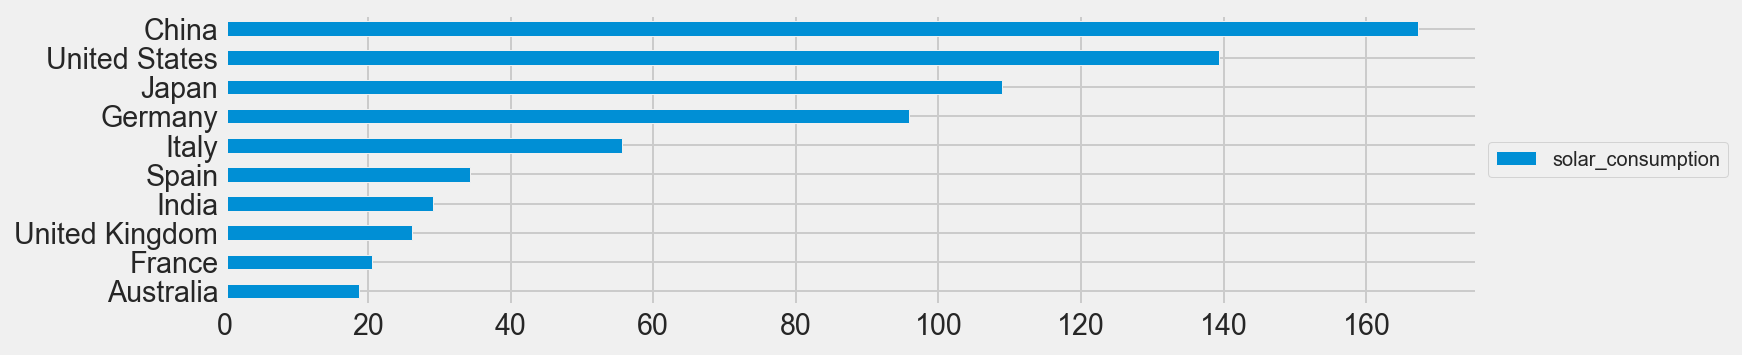

In [33]:
energy_ordered.tail(10).plot.barh(x='country', y=resource)
plt.ylabel('')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

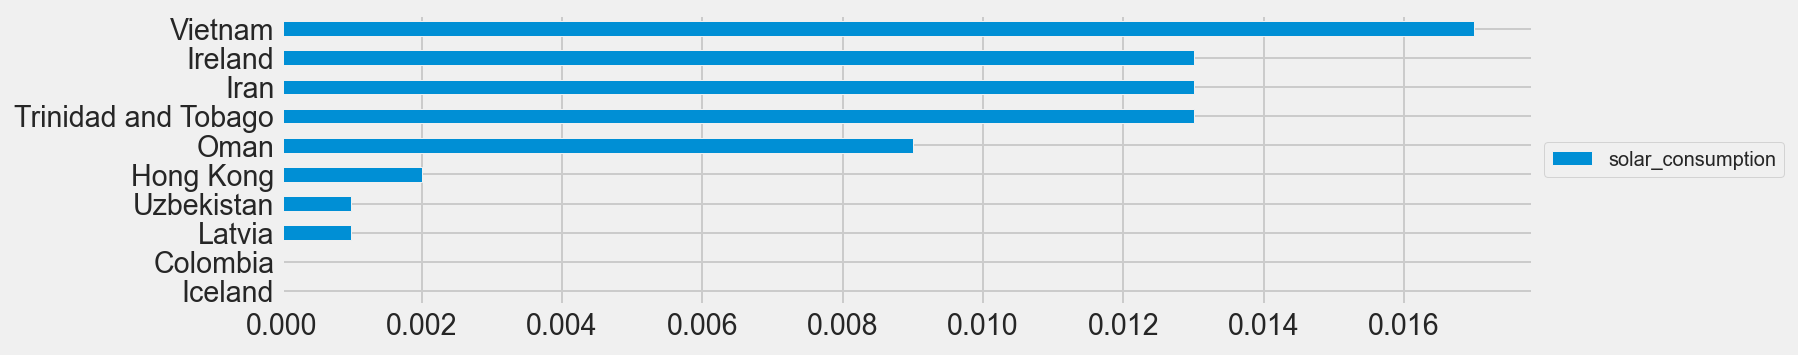

In [34]:
energy_ordered.head(10).plot.barh(x='country', y=resource)
plt.ylabel('')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Oil

In [35]:
resource = 'oil_consumption'

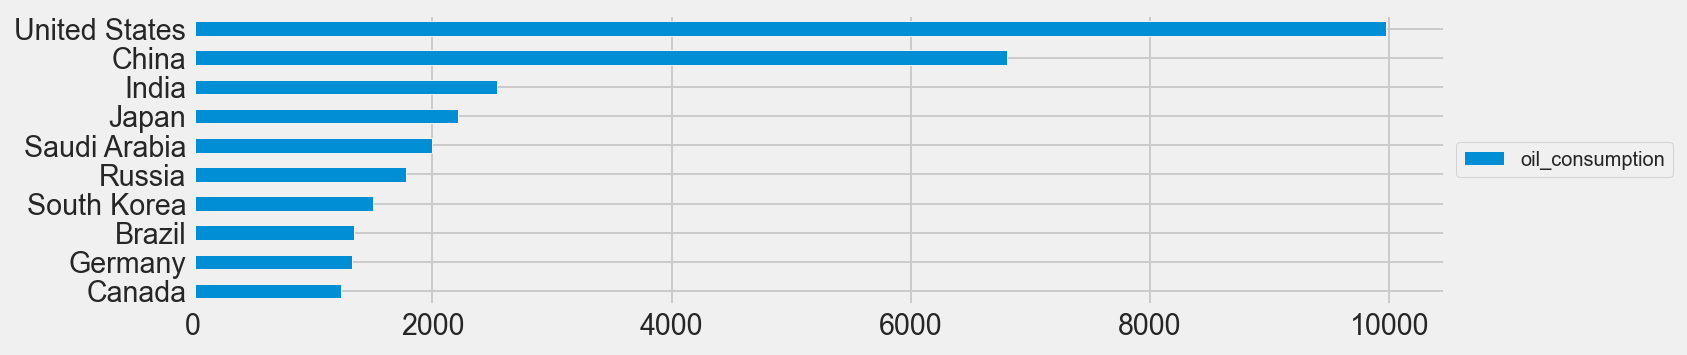

In [36]:
energy_ordered = data_energy_year.sort_values(by=[resource], ascending=True)

energy_ordered.tail(10).plot.barh(x='country', y=resource)
plt.ylabel('')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

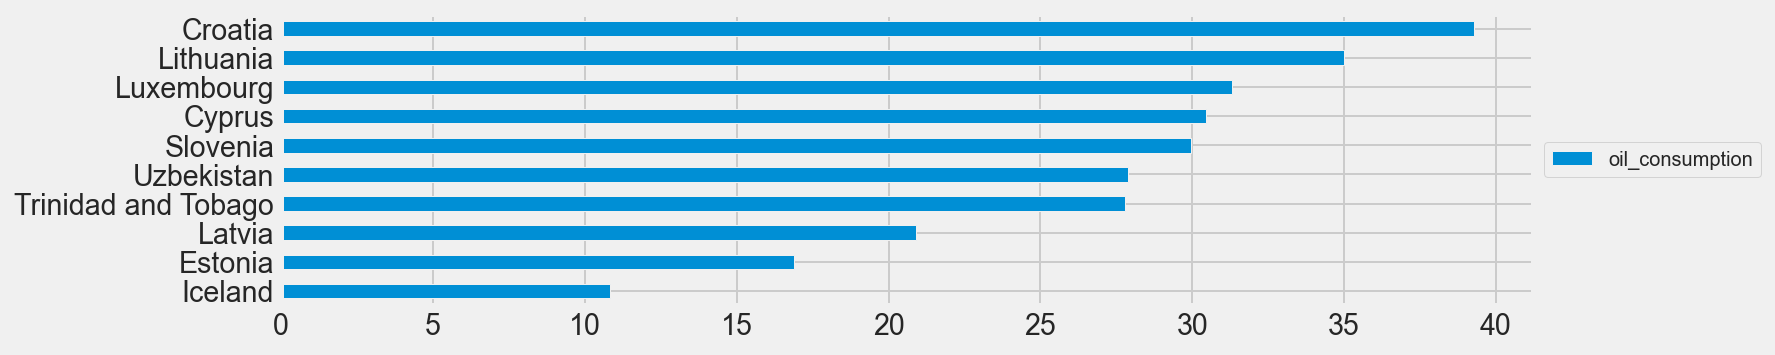

In [37]:
energy_ordered.head(10).plot.barh(x='country', y=resource)
plt.ylabel('')
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Insights

- Each dataset has the same # of rows
- 76 countries
- No skipped years from 2000 to 2016
- No seasonality

Resources

['coal_consumption',
 'oil_consumption',
 'gas_consumption',
 'nuclear_consumption',
 'solar_consumption',
 'wind_consumption',
 'hydro_consumption',
 'biofuel_consumption',
]

Countries

['Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan',
       'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada',
       'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Ecuador', 'Egypt', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hong Kong', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg',
       'Malaysia', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand',
       'Norway', 'Oman', 'Pakistan', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia',
       'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea',
       'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Thailand',
       'Trinidad and Tobago', 'Turkey', 'Turkmenistan', 'Ukraine',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uzbekistan', 'Vietnam']